In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Preprocessing data

In [2]:
df = pd.read_csv("c:/Users/lucho/Desktop/Programacion/Python/Github/100DaysOfCode/Machine_Learning_Python_R/Data Files/1. ST Academy - Crash course and Regression files/House_price.csv")
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [3]:
df.shape

(506, 19)

# EDD to describe data

In [4]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


As we can see in the describing data we can know that:
1. Data is missing in n_hot_rooms (We have 498.000000 and the others columns have 506.000000)
2. Outliers in crime rate, n_hot_rooms and rainfall

# Remove the column that is usseless

In [5]:
df.pop("bus_ter")

0      YES
1      YES
2      YES
3      YES
4      YES
      ... 
501    YES
502    YES
503    YES
504    YES
505    YES
Name: bus_ter, Length: 506, dtype: object

In [6]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474


# Outlier treatment

### For the n_hot_rooms that has upper outlier

In [7]:
# Look the value of the 99 percentile of the all table
np.percentile(df.n_hot_rooms,[99])[0]

15.399519999999999

In [8]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [9]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv

<ipython-input-9-4b3cba27422b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv


### For the rainfalls that has under outlier

In [10]:
lv = np.percentile(df.rainfall,[1])[0]
lv

20.0

In [11]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

<ipython-input-11-0dd828a01160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv


### For the rainfalls 

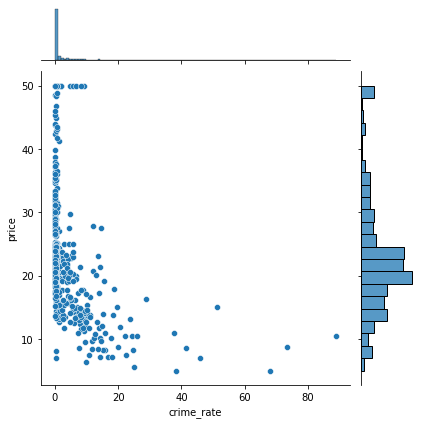

In [12]:
sns.jointplot(x = "crime_rate", y = "price", data = df)

As we can see in the graph we have a relationship between this to variables and for that we can say that we dont have an outlier

# Remove nulls values

In [13]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

We remove the missing values changing with the mean

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  parks        506 non-null    float64
dtypes: float64(15), int64(1), object(2)
memory usage: 

# Varaible transformation

## crime rate

In [15]:
df.crime_rate = np.log(1+df.crime_rate)

transform the data of crime rate to ajust for look more the relationship

## Distance of employeement

In [16]:
df["avg_dist"] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

Create a new column with the distance mean of all 4 distance and delete de 4 columns of distance

In [17]:
del df["dist1"]
del df["dist2"]
del df["dist3"]
del df["dist4"]

# Dummy variables

### Airport (2 categories) and Waterbody(4 categories)

In [18]:
df = pd.get_dummies(df)

In [19]:
del df["airport_NO"]

In [20]:
del df["waterbody_None"]

# Correlation matrix

In [21]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


### Plot a heatmap to saw more efficient in the corr matrix

<AxesSubplot:>

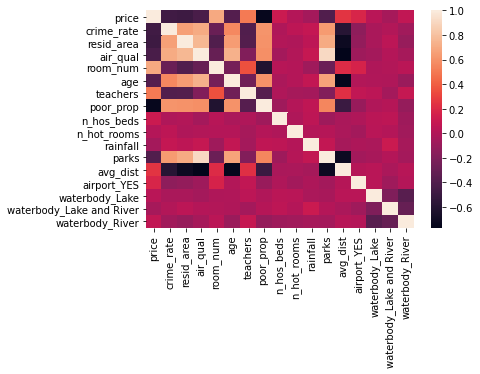

In [22]:
sns.heatmap(df.corr())

We can see a correlation between parks and air_equal becouse of that we have to delete one of the two columns
We can see thea air_equal have more correlation between the price for that we keep the column of air_equal

In [23]:
del df["parks"]

# End of the preprocessing part

# Machine learning part

## Simple linear regression using statsmodels.api

In [24]:
import statsmodels.api as sn

In [25]:
X = sn.add_constant(df["room_num"])

In [26]:
lm = sn.OLS(df["price"], X).fit()

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.31e-74
Time:                        17:45:12   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple linear regression using sklearn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
y = df[["price"]]

In [30]:
X = df[["room_num"]]

In [31]:
lm2 = LinearRegression()

In [32]:
lm2.fit(X,y)

LinearRegression()

In [33]:
print(lm2.intercept_, lm2.coef_)

[-34.65924312] [[9.09966966]]


In [34]:
lm2.predict(X)

array([[25.17108491],
       [23.76973578],
       [30.72188341],
       [29.02024518],
       [30.37609596],
       [23.85163281],
       [20.04797089],
       [21.50391804],
       [16.58099675],
       [19.97517353],
       [23.36935032],
       [20.02067188],
       [18.92871152],
       [19.4746917 ],
       [20.81234314],
       [18.42822969],
       [19.34729633],
       [19.84777816],
       [14.98855456],
       [17.45456504],
       [16.0259169 ],
       [19.62028642],
       [21.23092795],
       [18.23713663],
       [19.24719996],
       [16.28980732],
       [18.23713663],
       [20.36645933],
       [24.44311134],
       [26.07195221],
       [17.32716966],
       [20.59395107],
       [19.48379137],
       [17.21797363],
       [20.81234314],
       [19.32909699],
       [18.49192738],
       [18.57382441],
       [19.62938609],
       [25.3530783 ],
       [29.25683659],
       [26.9455205 ],
       [21.47661903],
       [21.85880515],
       [20.56665206],
       [17

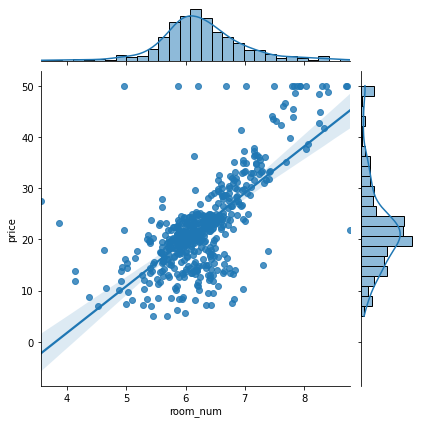

In [35]:
sns.jointplot(x = df["room_num"] , y = df["price"], kind="reg")

# Multiple Linear regression

### With statsmodels

In [36]:
import statsmodels.api as sn

In [37]:
X_multi = df.drop("price", axis=1)

In [38]:
Y_multi = df["price"]

In [39]:
x_multi_cons = sn.add_constant(X_multi)

In [40]:
x_multi_cons

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,2.4775,0,0,1,0
502,1.0,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,2.2875,1,0,1,0
503,1.0,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,2.1675,0,0,0,0
504,1.0,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,2.3900,1,0,0,0


In [41]:
lm_multi = sn.OLS(Y_multi, x_multi_cons).fit()

In [42]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          4.19e-125
Time:                        17:45:19   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### With sklearn

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [45]:
Y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [46]:
lm3 = LinearRegression()

In [47]:
lm3.fit(X_multi, Y_multi)

LinearRegression()

In [48]:
print(lm3.intercept_, lm3.coef_)

-6.498625198419852 [ 9.70998193e-03 -4.08746495e-02 -1.58973999e+01  4.01901676e+00
 -5.71475069e-03  1.00700068e+00 -5.77271243e-01  3.29221139e-01
  9.18675603e-02  1.61185504e-02 -1.21863952e+00  1.13151586e+00
  2.64086064e-01 -6.87555889e-01 -2.91318712e-01]


## Train test

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_multi,Y_multi, test_size = 0.2, random_state = 0)

In [51]:
lm_a = LinearRegression()

In [52]:
lm_a.fit(X_train, y_train)

LinearRegression()

In [53]:
y_test_a = lm_a.predict(X_test)

In [54]:
y_train_a = lm_a.predict(X_train)

## Accuracy

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_test,y_test_a)

0.5496468288205675

In [57]:
r2_score(y_train,y_train_a)

0.756463540591123

# Ridge-lasso

## Standarize the variables

In [58]:
from sklearn import preprocessing

In [59]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [60]:
X_train_s = scaler.transform(X_train)

In [61]:
X_test_s = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import Ridge

In [63]:
lm_r = Ridge(alpha = 0.5)

In [64]:
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [65]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5494318046087934

In [90]:
from sklearn.model_selection import validation_curve

In [91]:
# Create 100 values 
param_range = np.logspace(-2,8-100)

In [92]:
# This are our lambda values
param_range

array([1.00000000e-02, 1.45634848e-04, 2.12095089e-06, 3.08884360e-08,
       4.49843267e-10, 6.55128557e-12, 9.54095476e-14, 1.38949549e-15,
       2.02358965e-17, 2.94705170e-19, 4.29193426e-21, 6.25055193e-23,
       9.10298178e-25, 1.32571137e-26, 1.93069773e-28, 2.81176870e-30,
       4.09491506e-32, 5.96362332e-34, 8.68511374e-36, 1.26485522e-37,
       1.84206997e-39, 2.68269580e-41, 3.90693994e-43, 5.68986603e-45,
       8.28642773e-47, 1.20679264e-48, 1.75751062e-50, 2.55954792e-52,
       3.72759372e-54, 5.42867544e-56, 7.90604321e-58, 1.15139540e-59,
       1.67683294e-61, 2.44205309e-63, 3.55648031e-65, 5.17947468e-67,
       7.54312006e-69, 1.09854114e-70, 1.59985872e-72, 2.32995181e-74,
       3.39322177e-76, 4.94171336e-78, 7.19685673e-80, 1.04811313e-81,
       1.52641797e-83, 2.22299648e-85, 3.23745754e-87, 4.71486636e-89,
       6.86648845e-91, 1.00000000e-92])

In [96]:
train_scores, test_scores = validation_curve(Ridge(),X_train_s, y_train, param_name="alpha" , param_range= param_range, scoring="r2")

In [97]:
print(train_scores)
print(test_scores)

[[0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0.76259356 0.75261469 0.78222588 0.74587517]
 [0.74930818 0

In [98]:
train_mean = np.mean(train_scores,axis = 1)

In [99]:
test_mean = np.mean(test_scores,axis=1)

In [100]:
train_mean

array([0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235, 0.7585235,
       0.7585235, 0.7585235])

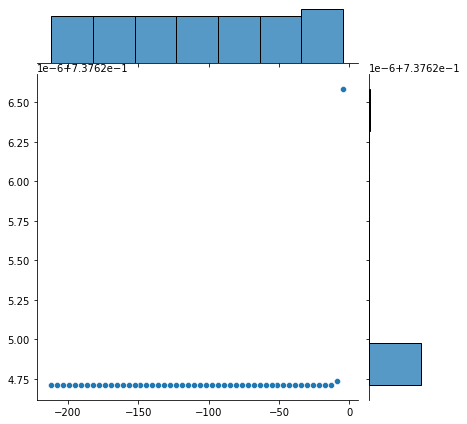

In [101]:
sns.jointplot(x = np.log(param_range), y = test_mean)

In [ ]:
lm_